In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
import slopestabilitytools

In [2]:
data = pd.read_csv('../results/data/hor_09.csv')
#data_train = pd.read_csv('../results/data/hor_11.csv')

(array([  2.,   0.,  24., 283., 324.,  77.,  45.,  26.,  27.,  24.,  15.,
         28.,  15.,  15.,  10.,  10.,   7.,  12.,  11.,  13.,  11.,  18.,
         12.,  22.,  18.,  14.,  18.,  16.,  20.,  14.,  16.,  27.,  20.,
         20.,  24.,  23.,  36.,  28.,  36.,  40.,  36.,  38.,  65., 182.,
        177., 174., 221., 302.,  77.,  53.]),
 array([0.83536312, 0.88890352, 0.94244393, 0.99598433, 1.04952474,
        1.10306515, 1.15660555, 1.21014596, 1.26368636, 1.31722677,
        1.37076718, 1.42430758, 1.47784799, 1.53138839, 1.5849288 ,
        1.63846921, 1.69200961, 1.74555002, 1.79909042, 1.85263083,
        1.90617124, 1.95971164, 2.01325205, 2.06679245, 2.12033286,
        2.17387326, 2.22741367, 2.28095408, 2.33449448, 2.38803489,
        2.44157529, 2.4951157 , 2.54865611, 2.60219651, 2.65573692,
        2.70927732, 2.76281773, 2.81635814, 2.86989854, 2.92343895,
        2.97697935, 3.03051976, 3.08406017, 3.13760057, 3.19114098,
        3.24468138, 3.29822179, 3.35176219, 3.

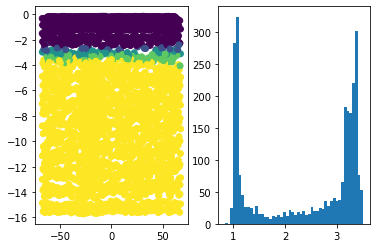

In [14]:
x = data['X']#; x_train = data_train['X']
y = data['Y']#; y_train = data_train['Y']
x_train = data['RESN'].to_numpy()#; resn_train = data_train['RESN']
classn = data['CLASSN']#; classn_train = data_train['CLASSN']
x_test = np.linspace(x_train.min(), x_train.max(), len(x_train))

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(x, y, c=classn)
ax[1].hist(x_train, bins=50)

In [15]:
hist, bins = np.histogram(x_train, bins=50)
threshold = max(hist)*0.01
good_bins = np.where(hist >= threshold)
good_indexes = np.array([])
for bin_end in good_bins[0]:
    temp = np.where(x_train >= bins[bin_end - 1])
    temp1 = np.where(x_train  <= bins[bin_end])
    ids = np.intersect1d(temp, temp1)
    good_indexes = np.append(good_indexes, ids, axis=0)
good_indexes = np.unique(good_indexes).astype(int)
x_train = x_train[good_indexes]

(array([ 24., 250., 341.,  84.,  44.,  25.,  26.,  30.,  13.,  23.,  19.,
         14.,  11.,  12.,   8.,   7.,  11.,  10.,  10.,  13.,  16.,  13.,
         16.,  20.,  13.,  14.,  17.,  17.,  18.,  14.,  19.,  21.,  19.,
         16.,  24.,  23.,  33.,  23.,  35.,  36.,  42.,  32.,  30., 112.,
        172., 158., 164., 223., 289.,  67.]),
 array([0.94505756, 0.99531051, 1.04556346, 1.09581641, 1.14606936,
        1.19632231, 1.24657526, 1.29682822, 1.34708117, 1.39733412,
        1.44758707, 1.49784002, 1.54809297, 1.59834592, 1.64859888,
        1.69885183, 1.74910478, 1.79935773, 1.84961068, 1.89986363,
        1.95011658, 2.00036953, 2.05062249, 2.10087544, 2.15112839,
        2.20138134, 2.25163429, 2.30188724, 2.35214019, 2.40239314,
        2.4526461 , 2.50289905, 2.553152  , 2.60340495, 2.6536579 ,
        2.70391085, 2.7541638 , 2.80441676, 2.85466971, 2.90492266,
        2.95517561, 3.00542856, 3.05568151, 3.10593446, 3.15618741,
        3.20644037, 3.25669332, 3.30694627, 3.

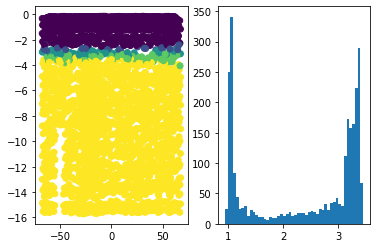

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(x[good_indexes], y[good_indexes], c=classn[good_indexes])
ax[1].hist(x_train, bins=50)

{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.1, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0}


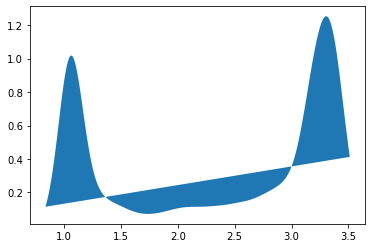

In [68]:
kde_model = KernelDensity(bandwidth=0.1)
kde_model.fit(x_train.reshape(-1, 1))
score = kde_model.score_samples(x_test.reshape(-1, 1))

fig = plt.fill(x_test, np.exp(score))

print(kde_model.get_params())

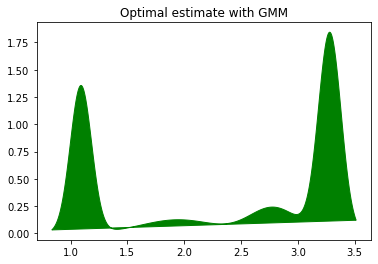

optimal number of components: 4.00


NameError: name 'gmm_x' is not defined

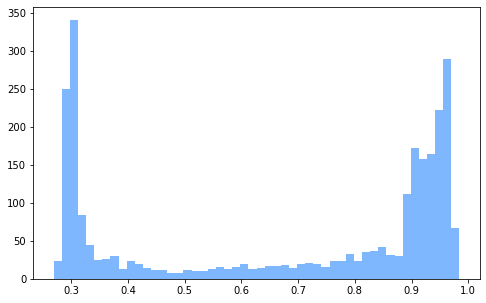

In [23]:
components = np.arange(1,5,1)
gmm = GaussianMixture(covariance_type="full", tol=100)
grid = GridSearchCV(gmm, {'n_components': components})
grid.fit(x_train.reshape(-1, 1))
gmm = grid.best_estimator_
log_dens = gmm.score_samples(x_test.reshape(-1, 1))
plt.fill(x_test, np.exp(log_dens), c='green')
plt.title('Optimal estimate with GMM')
plt.show()
print("optimal number of components: " + "{:.2f}".format(gmm.n_components))

#gmm = gmm.fit(X=x_train.reshape(-1, 1))
#gmm_x = x_test
#gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1, 1)))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[8, 5])
ax.hist(x_train/x_test.max(), bins=50, alpha=0.5, color="#0070FF")
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")